In [1]:
%matplotlib inline

import os
import cartopy.crs as ccrs
from cartopy.io import shapereader

import matplotlib.pyplot as plt

directory = "data"
stations = shapereader.Reader(os.path.join(directory, "stations.shp"))
hfradar_point = shapereader.Reader(os.path.join(directory, "hfradar_point.shp"))
hfradar_polygon = shapereader.Reader(os.path.join(directory, "hfradar_polygon.shp"))

/home/filipe/miniconda/envs/secoora-skill/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


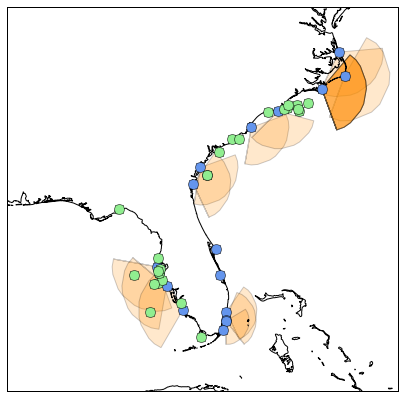

In [2]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(7, 7),
                       subplot_kw=subplot_kw)

dx = dy = 1.25
bbox = [-87.40-dx, -74.70+dx, 24.25-dy, 36.70+dy]
ax.set_extent(bbox)

for record in hfradar_polygon.records():
    name = record.attributes['name']
    geometry = record.geometry
    ax.add_geometries([geometry], ccrs.PlateCarree(),
                      facecolor=u'DarkOrange', edgecolor=u'black', alpha=0.2)

for record in hfradar_point.records():
    name = record.attributes['name']
    geometry = record.geometry
    if geometry.geom_type == 'Point':
        ax.plot(geometry.x, geometry.y, marker='o', markersize=10,
                markerfacecolor=u'cornflowerblue', markeredgecolor=u'black')

for record in stations.records():
    name = record.attributes['name']
    geometry = record.geometry
    if geometry.geom_type == 'Point':
        ax.plot(geometry.x, geometry.y, marker='o', markersize=10,
                markerfacecolor=u'lightgreen', markeredgecolor=u'black')

ax.coastlines('10m');